# CHAPTER 1 demonstrates some applications of WAFO

## Section 1.4 Some applications of WAFO

### Section 1.4.1 Simulation from spectrum, estimation of spectrum 

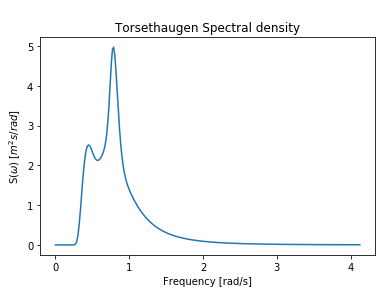

In [1]:
import wafo.spectrum.models as wsm
S = wsm.Torsethaugen(Hm0=6, Tp=8);
S1 = S.tospecdata()
h=S1.plot()

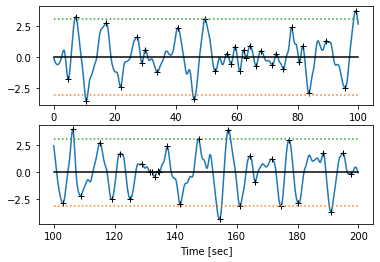

In [2]:
import wafo.objects as wo
xs = S1.sim(ns=2000, dt=0.1)
ts = wo.mat2timeseries(xs)
h=ts.plot_wave('-')

#### Estimation of spectrum 

[0, 3, 0, 5]

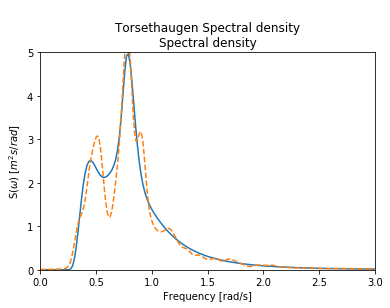

In [3]:
import matplotlib.pyplot as plt
Fs = 4;  
xs = S1.sim(ns=int(20 * 60 * Fs), dt=1. / Fs) 
ts = wo.mat2timeseries(xs) 
Sest = ts.tospecdata(L=400)
S1.plot()
Sest.plot('--')
plt.axis([0, 3, 0, 5]) # This may depend on the simulation


### Section 1.4.2 Probability distributions of wave characteristics.

[0, 10, 0, 0.35]

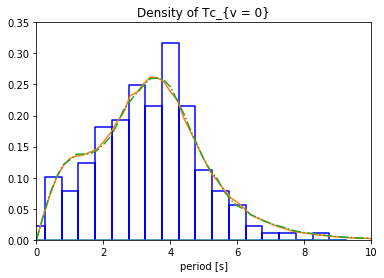

In [4]:
import wafo.misc as wm
dtyex = S1.to_t_pdf(pdef='Tt', paramt=(0, 10, 51), nit=3)
dtyest = Sest.to_t_pdf(pdef='Tt', paramt=(0, 10, 51), nit=3)

T, index = ts.wave_periods(vh=0, pdef='d2u')
bins = wm.good_bins(T, num_bins=25, odd=True)
wm.plot_histgrm(T, bins=bins, density=True)

dtyex.plot()
dtyest.plot('-.')
plt.axis([0, 10, 0, 0.35])


### Section 1.4.3 Directional spectra

c:\users\peran\documents\workspace\pywafo\src\wafo\spectrum\models.py:1896: RuntimeWarning: divide by zero encountered in power
  s = where(wn <= wn_c, spa * wn ** ma, spb * wn ** mb)


((<matplotlib.contour.QuadContourSet at 0x239e114e9c8>,
  [Text(0.5, 1.0, 'Directional Spectrum'),
   Text(0.5, 0, 'Frequency [rad/s]'),
   Text(0, 0.5, '$S(w,\\theta) [m**2 s / rad**2]$'),
   Text(0, 0.5, '$S(w,\\theta) [m**2 s / rad**2]$')]),
 None)

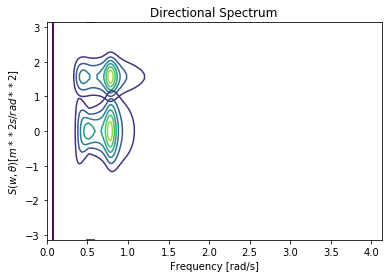

In [5]:
import numpy as np
plotflag = 1
Nt = 101;   # number of angles
th0 = np.pi / 2; # primary direction of waves
Sp = 15;   # spreading parameter

D1 = wsm.Spreading(type='cos', theta0=th0, method=None) # frequency independent
D12 = wsm.Spreading(type='cos', theta0=0, method='mitsuyasu') # frequency dependent

SD1 = D1.tospecdata2d(S1)
SD12 = D12.tospecdata2d(S1)
SD1.plot()
SD12.plot()#linestyle='dashdot')


#### 3D Simulation of the sea surface 

##### Frequency independent spreading

In [6]:
#plotflag = 1; iseed = 1;
#
#Nx = 2 ^ 8;Ny = Nx;Nt = 1;dx = 0.5; dy = dx; dt = 0.25; fftdim = 2;
#randn('state', iseed)
#Y1 = seasim(SD1, Nx, Ny, Nt, dx, dy, dt, fftdim, plotflag);
#wafostamp('', '(ER)')
#axis('fill')
#disp('Block = 6'), pause(pstate)

##### Frequency dependent spreading

In [7]:
#randn('state', iseed)
#Y12 = seasim(SD12, Nx, Ny, Nt, dx, dy, dt, fftdim, plotflag);
#wafostamp('', '(ER)')
#axis('fill')

### Estimation of directional spectrum

In [8]:
# Nx = 3; Ny = 2; Nt = 2 ^ 12; dx = 10; dy = 10;dt = 0.5;
# F = seasim(SD12, Nx, Ny, Nt, dx, dy, dt, 1, 0);  
# Z = permute(F.Z, [3 1 2]);
# [X, Y] = meshgrid(F.x, F.y);
# N = Nx * Ny;
# types = repmat(sensortypeid('n'), N, 1);
# bfs = ones(N, 1);
# pos = [X(:), Y(:), zeros(N, 1)];
# h = inf;
# nfft = 128;
# nt = 101;
# SDe = dat2dspec([F.t Z(:, :)], [pos types, bfs], h, nfft, nt);
#plotspec(SDe), hold on
#plotspec(SD12, '--'), hold off
#disp('Block = 8'), pause(pstate)


### Section 1.4.4 Fatigue, Load cycles and Markov models

In [9]:
#clf()
#paramu = [-6 6 61];
#frfc = spec2cmat(S1, [], 'rfc', [], paramu);
#pdfplot(frfc);
#hold on
#tp = dat2tp(xs);
#rfc = tp2rfc(tp);
#plot(rfc(:, 2), rfc(:, 1), '.')
#wafostamp('', '(ER)')
#hold off
#disp('Block = 9'), pause(pstate)

### Section 1.4.5 Extreme value statistics

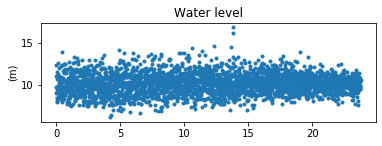

In [10]:
import matplotlib.pyplot as plt
import wafo.data as wd
xn = wd.yura87()
#xn = load('yura87.dat'); 
plt.subplot(211) 
plt.plot(xn[::30, 0] / 3600, xn[::30, 1], '.')
plt.title('Water level')
h=plt.ylabel('(m)')

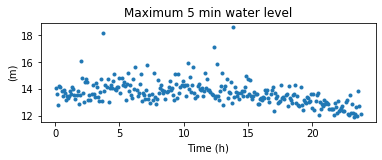

In [11]:
yura = xn[:85500, 1]
yura = np.reshape(yura, (285, 300)).T
maxyura = yura.max(axis=0)
plt.subplot(212)
plt.plot(xn[299:85500:300, 0] / 3600, maxyura, '.')
plt.xlabel('Time (h)')
plt.ylabel('(m)')
h=plt.title('Maximum 5 min water level')

c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:1518: UserWarning: P-value is on the conservative side (i.e. too large) due to ties in the data!
  'P-value is on the conservative side (i.e. too large) due to' +


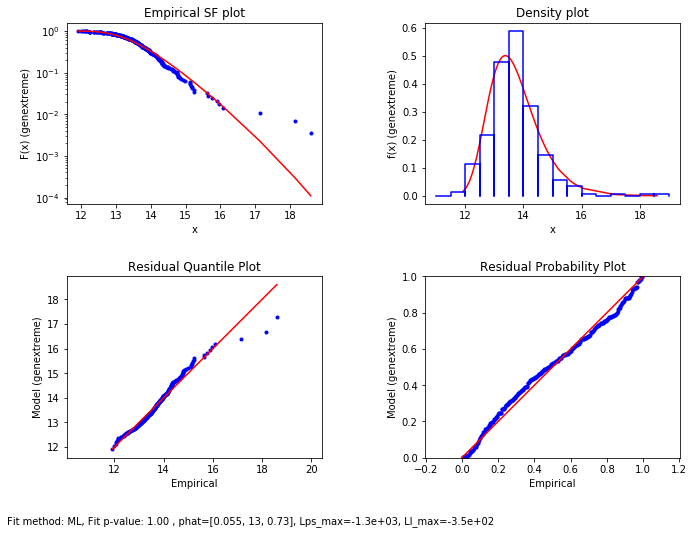

In [12]:
import wafo.stats as ws
phat = ws.genextreme.fit2(maxyura, method='ml')
phat.plotfitsummary()

#disp('Block = 11, Last block')